## What is poisson ratio for vertex model?

Here is the model:

$$ E = k_A \left(A-A_r\right)^2 + k_P \left(P - P_r\right)^2 $$

### What does the cell look like?
![title](2024_11_22_analytic_deform_img/diagram-20241122.png)



### Finding the area and the perimeter:
We can set $l_i$ to one, since we can just replace it with alpha and beta - which can directly represent dimenions of the hexagon.
$$ A = 6 \cdot A_{triangle} = 6 \cdot \frac{1}{2} \left[\alpha \cdot \beta \frac{\sqrt{3}}{2}\right] $$
$$ A\left(\alpha, \beta\right) = \frac{3\sqrt{3}}{2}\alpha  \beta $$

$$ P = 2 \cdot \left[\alpha\right] + 4 \left[\frac{1}{2} \sqrt{\alpha^2 + 3 \beta^2} \right] $$
$$ P\left(\alpha, \beta\right) = 2 \alpha + 2 \sqrt{\alpha^2 + 3 \beta^2}  $$

## Using sympy to define stuff

In [98]:
import sympy
sympy.init_printing()

def create_area_symexp(
    s_alpha,
    s_beta,
):
    s_A = (sympy.sqrt(3)*3/2)*s_alpha*s_beta
    return s_A

def create_perim_symexp(
    s_alpha,
    s_beta,
):
    s_P = 2*s_alpha + 2*sympy.sqrt(s_alpha**2 + 3 * s_beta**2)
    return s_P

def area_energy_symexp(
    s_alpha,
    s_beta,
    s_Area_rest,
    s_k_A,
):
    s_Area = create_area_symexp(s_alpha, s_beta)
    return s_k_A * (s_Area - s_Area_rest)**2
    pass

def perimeter_energy_symexp(
    s_alpha,
    s_beta,
    s_P_r,
    s_k_P,
):
    s_Perimeter = create_perim_symexp(s_alpha, s_beta)
    return s_k_P * (s_Perimeter - s_P_r)**2
    

def create_energy_symexp(
    s_alpha,
    s_beta,
    s_Area_rest,
    s_Perimeter_rest,
    s_k_A,
    s_k_P,
):
    s_E_area = area_energy_symexp(s_alpha, s_beta, s_Area_rest, s_k_A)
    s_E_perim = perimeter_energy_symexp(s_alpha, s_beta, s_Perimeter_rest, s_k_P)
    
    
    s_E = s_E_area + s_E_perim
    
    return s_E
    

alpha, beta = sympy.symbols("alpha beta", real=True, positive=True)
A_r, P_r = sympy.symbols("A_r P_r", real=True, positive=True)
k_A, k_P = sympy.symbols("k_A k_P", real=True)

energy_basic = create_energy_symexp(
    alpha,beta, A_r, P_r, k_A, k_P,
)

sympy.Eq(
    sympy.Function('E')(alpha, beta, A_r, P_r, k_A, k_P),
    energy_basic,
)


## Holding the x and y stretching equal:
$$ \alpha = \beta = \gamma $$

In [99]:
gamma = sympy.symbols("gamma" , real=True ,positive=True)
energy_iso = energy_basic.subs([
    (alpha, gamma),
    (beta, gamma),
])

sympy.Eq(
    sympy.Function('E')(gamma, A_r, P_r, k_A, k_P),
    energy_iso,
)

### Expanding the energy::

In [100]:

sympy.Eq(
    sympy.Function('E')(gamma, A_r, P_r, k_A, k_P),
    energy_iso.expand(),
)

### Conditions for equilibrium:
$$ \left.\frac{\partial E}{\partial \gamma} \right|_{\gamma = \gamma_{equilibrium}} = 0 $$

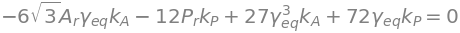

In [101]:
denergy_iso_dgamma = energy_iso.diff(gamma).expand()
sympy.Eq(
    denergy_iso_dgamma.subs([
        (gamma, sympy.symbols(r"\gamma_{eq}")),
    ]),
    0,
)

# What is the Poisson ratio?
When the cell is at equilibrium, $\partial E/\partial \alpha = \partial E / \partial \beta = 0$. We will look at an equilibrium where $\alpha_{rest} = \beta_{rest} = \gamma_{rest}$

So we can describe the behavior of energy in the neighborhood of equillibrium with just the second order derivatives:

$$ E(\delta \alpha ,\delta \beta) \approx \left(\delta \alpha\right)^2\frac{1}{2} \left.\frac{\partial^2 E}{\partial \alpha^2}\right|_{\alpha=\beta=\gamma_{rest}} + \left(\delta \beta\right)^2\frac{1}{2} \left.\frac{\partial^2 E}{\partial \beta^2}\right|_{\alpha=\beta=\gamma_{rest}} + \left(\delta \alpha\right)\left(\delta \beta\right) \left.\frac{\partial^2 E}{\partial \alpha \partial \beta}\right|_{\alpha=\beta=\gamma_{rest}}$$

The poisson ratio is defined as the negative ratio of the strain rates in x and y. Strain in x is $\delta \alpha / \alpha_{rest}$, and strain in y is $\delta \beta / \beta_{rest}$. So, the negative ratio is: $-(\delta \beta)/(\delta\alpha)$. 
$$ \nu = \frac{- d\varepsilon_{transverse}}{d\varepsilon_{axial}} = - \frac{\delta \beta / \beta_{rest}}{\delta \alpha / \alpha_{rest}} = - \frac{\delta \beta / \gamma_{rest}}{\delta \alpha / \gamma_{rest}}  $$
$$ \nu = \frac{- \delta \beta}{\delta \alpha} $$

We probe the system by holding $\delta \alpha$ to a constant, infinitesimal value - then finding the value of $\delta\beta$ that will give the minimum energy in beta space.

At the equilibrium value of $\delta\beta$, we should have
$$ \frac{\partial E}{\partial \beta} = 0 $$
Plugging in the second order approximation of energy around equilibrium:
$$ \left(\delta \beta\right) \left.\frac{\partial^2 E}{\partial \beta^2}\right|_{\alpha=\beta=\gamma} + \left(\delta \alpha\right) \left.\frac{\partial^2 E}{\partial \alpha \partial \beta}\right|_{\alpha=\beta=\gamma}  = 0 $$
Moving this into form of poisson ratio:
$$ - \frac{\delta \beta}{\delta \alpha}  = \frac{  \left.\frac{\partial^2 E}{\partial \alpha \partial \beta}\right|_{\alpha=\beta=\gamma}  }{  \left.\frac{\partial^2 E}{\partial \beta^2}\right|_{\alpha=\beta=\gamma}  } $$
$$ \nu  =  \left.\frac{ \partial^2 E / \left(\partial  \alpha \partial \beta\right)   }{ \partial^2 E  / \partial \beta^2  }\right|_{\alpha=\beta=\gamma} $$

In [102]:
# poisson_ratio_step1 = energy_basic.diff(alpha).diff(beta) / energy_basic.diff(beta).diff(beta)


# # poisson_ratio_step1.subs([("alpha"), ()])
# sympy.Eq(
#     sympy.Function('nu')(*sympy.symbols(r"\alpha_{rest} \beta_{rest}"), k_A, k_P, A_r, P_r),
#     poisson_ratio_step1,
# )

In [103]:
# poisson_ratio_step2 = poisson_ratio_step1.subs([
#     (alpha, gamma),
#     (beta, gamma),
# ]).simplify()

# sympy.Eq(
#     sympy.Function('nu')(gamma, k_A, k_P, A_r, P_r),
#     poisson_ratio_step2
# )

# Simplifying the system...


### We can do a change of variables, basically changing length scale:
$$ \begin{align}
 \alpha &= \mu \tilde{\alpha} \\
 \beta &= \mu \tilde{\beta} \\
 \gamma &= \mu \tilde{\gamma} \\
P_r &= \mu \tilde{P_r} \\
k_P &= \frac{1}{\mu^2} \tilde{k_P}\\
A_r &= \mu^2 \tilde{A_r} \\
k_A &= \frac{1}{\mu^4} \tilde{k_A} \\
 \end{align}
 $$


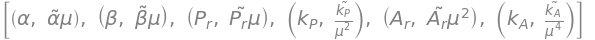

In [104]:
mu = sympy.symbols("mu", real=True, positive=True)
# mu = 1 / P_r

k_A_til, k_P_til, alpha_til, beta_til, P_r_til, A_r_til =  sympy.symbols(r"\tilde{k_A} \tilde{k_P} \tilde{\alpha} \tilde{\beta}  \tilde{P_r} \tilde{A_r}", real=True, positive=True)

tilde_mu_substitutions = [
    (alpha, alpha_til *mu),
    (beta, beta_til*mu),
    (P_r, P_r_til*mu),
    (k_P, k_P_til/mu**2),
    (A_r,  A_r_til*mu**2),
    (k_A, k_A_til / mu**4),
]
# display(tilde_mu_substitutions)
tilde_mu_substitutions

## Picking mu to make $\tilde{P_r}$ equal one:
We only want to explore the landscape of derivatives of E with respect to alpha and beta, so we can pick a mu that depends on $P_r$, without affecting stuff
$$ \mu = P_r $$
$$ P_r = \mu \tilde{P_r} $$
$$ P_r = P_r \tilde{P_r} $$
$$  \tilde{P_r} = 1 $$

We can do change of variables to the energy equation:

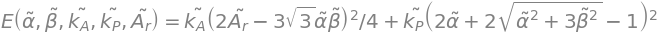

In [105]:
E_mu_subbed = energy_basic.subs(
    tilde_mu_substitutions
).simplify().subs([
    (P_r_til, 1)
])

# sympy.Eq(
#     sympy.Function("E")(alpha_til, beta_til, A_r),
#     E_tilded,
# )

sympy.Eq(
    sympy.Function("E")(alpha_til, beta_til, k_A_til, k_P_til ,A_r_til),
    E_mu_subbed,
)

### We can factor out one of the energy coefficients:
$$ \tilde{X} = \tilde{k_A} / \tilde{k_P} $$
$$ \tilde{k_A} = \tilde{X} \tilde{k_P} $$

Note:
$$
\begin{align}
k_P &= \frac{1}{\mu^2} \tilde{k_P}\\
k_A &= \frac{1}{\mu^4} \tilde{k_A} \\
\end{align}
$$

So,
$$ \tilde{X} = \tilde{k_A} / \tilde{k_P} = \frac{\mu^4 k_A}{\mu^2 k_P} = \mu^2 \frac{k_A}{k_P} = P_r^2 \frac{k_A}{k_P}$$

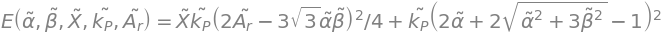

In [106]:
X_til = sympy.symbols(r"\tilde{X}" ,real=True, positive=True)

E_tilde_FIRST_step = E_mu_subbed.subs([
    (k_A_til, X_til * k_P_til),
])

sympy.Eq(
    sympy.Function("E")(alpha_til, beta_til, X_til, k_P_til ,A_r_til),
    E_tilde_FIRST_step
)

### Defining $\tilde{E} = E/\tilde{k_P}$

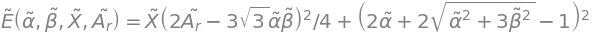

In [107]:
E_tilded = (E_tilde_FIRST_step / k_P_til).simplify()
sympy.Eq(
    sympy.Function(r"\tilde{E}")(alpha_til, beta_til, X_til ,A_r_til),
    E_tilded,
)

### What is the poisson ratio?

$$
\begin{align}
\frac{\partial E}{\partial \alpha} &= \frac{\partial}{\partial \alpha} E \\
 &= \tilde{k_P} \frac{\partial}{\partial \alpha} \tilde{E} \left(  \tilde{\alpha}\left(\alpha\right), \tilde{\beta}, \tilde{k_A}, \tilde{k_P}, \tilde{A_r}  \right) \\
 &= \tilde{k_P} \frac{\partial \tilde{\alpha}}{\partial \alpha} \frac{\partial}{\partial \tilde{\alpha}} \tilde{E} \left(  \tilde{\alpha}\left(\alpha\right), \tilde{\beta}, \tilde{k_A}, \tilde{k_P}, \tilde{A_r}  \right) \\
\frac{\partial E}{\partial \alpha} &= \frac{\tilde{k_P} }{\mu}  \frac{\partial \tilde{E}}{\partial \tilde{\alpha}}  \\
\end{align}
$$
Following similar for other derivatives,
$$ \frac{\partial E}{\partial \alpha} = \frac{ \tilde{k_P}}{\mu} \frac{\partial \tilde{E}}{\partial \tilde{\alpha}},\ \frac{\partial E}{\partial \beta} = \frac{ \tilde{k_P}}{\mu} \frac{\partial \tilde{E}}{\partial \tilde{\beta}} $$

$$ \frac{\partial^2 E}{\partial \alpha^2} = \frac{ \tilde{k_P}}{\mu^2} \frac{\partial^2 \tilde{E}}{\partial \tilde{\alpha}^2},\ \frac{\partial^2 E}{\partial \beta^2} = \frac{ \tilde{k_P}}{\mu^2} \frac{\partial^2 \tilde{E}}{\partial \tilde{\beta}^2},\ \frac{\partial^2 E}{\partial \alpha \partial \beta} = \frac{ \tilde{k_P}}{\mu^2} \frac{\partial^2 \tilde{E}}{\partial \tilde{\alpha} \partial \tilde{\beta}} $$



So poisson's ratio is the 'same':
$$
\begin{align}
    \nu  &=  \left.\frac{ \partial^2 E / \left(\partial  \alpha \partial \beta\right)   }{ \partial^2 E  / \partial \beta^2  }\right|_{\alpha=\beta=\gamma} \\
      &=  \left.\frac{ \left( \tilde{k_P}/\mu^2 \right) \partial^2 \tilde{E} / \left(\partial  \tilde{\alpha} \partial \tilde{\beta}\right)   }{ \left( \tilde{k_P}/\mu^2 \right) \partial^2 \tilde{E}  / \partial \tilde{\beta}^2  }\right|_{\tilde{\alpha}=\tilde{\beta}=\tilde{\gamma}} \\
      &=  \left.\frac{ \partial^2 \tilde{E} / \left(\partial  \tilde{\alpha} \partial \tilde{\beta}\right)   }{  \partial^2 \tilde{E}  / \partial \tilde{\beta}^2  }\right|_{\tilde{\alpha}=\tilde{\beta}=\tilde{\gamma}} \\
     \nu &= \tilde{\nu} \\
    \end{align}
$$

### Finding relevant second order derivatives in $\tilde{E}, $

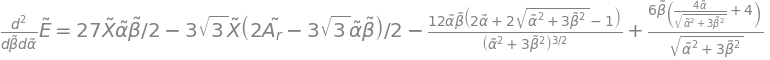

In [108]:
d2E_til_dalpha_til_dbeta_til = E_tilded.diff(alpha_til).diff(beta_til)

sympy.Eq(
    sympy.Derivative(sympy.symbols(r"\tilde{E}"), alpha_til, beta_til),
    d2E_til_dalpha_til_dbeta_til,
)

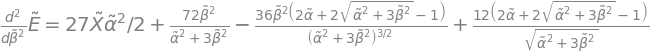

In [37]:
d2E_til_d2beta_til = E_tilded.diff(beta_til).diff(beta_til)

sympy.Eq(
    sympy.Derivative(sympy.symbols(r"\tilde{E}"), beta_til, beta_til),
    d2E_til_d2beta_til,
)

### So poisson ratio should be given at $\tilde{\alpha}_{eq}, \tilde{\beta}_{eq}$ by:

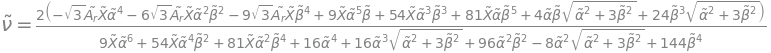

In [39]:
poisson_tilde_NOT_gam_subbed = (d2E_til_dalpha_til_dbeta_til / d2E_til_d2beta_til).simplify()

sympy.Eq(
    sympy.symbols(r"\tilde{\nu}"),
    poisson_tilde_NOT_gam_subbed,
)

### We are evaluating poisson ratio at $\tilde{\alpha}_{eq} = \tilde{\beta}_{eq} = \tilde{\gamma}_{eq}$:

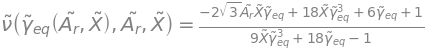

In [40]:
gamma_til = sympy.symbols(r"\tilde{\gamma}", real=True, positive=True)

poisson_tilde_of_gamma = poisson_tilde_NOT_gam_subbed.subs([
    (alpha_til, gamma_til),
    (beta_til, gamma_til),
]).simplify()

sympy.Eq(
    sympy.Function(r"\tilde{\nu}")(
        sympy.Function(r"\tilde{\gamma}_{eq}")(A_r_til, X_til),
        A_r_til,
        X_til,
    ),
    poisson_tilde_of_gamma.subs([
        (gamma_til , sympy.symbols(r"\tilde{\gamma}_{eq}")),
    ]),
)

### We find the equilibrium gamma like this:
$$ \tilde{E}(\gamma) = \tilde{E}(\alpha=\gamma ,\beta=\gamma) $$
The energy minimum in gamma will satisfy:
$$ d\tilde{E}/d\tilde{\gamma} = 0 $$

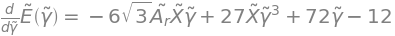

In [15]:
dE_til_iso_dgamma = E_tilded.subs([
    (alpha_til, gamma_til),
    (beta_til, gamma_til),
]).diff(gamma_til).expand()

sympy.Eq(
    sympy.Derivative(sympy.Function(r"\tilde{E}")(gamma_til), gamma_til),
    dE_til_iso_dgamma
)

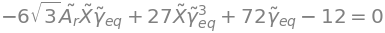

In [16]:
sympy.Eq(
    dE_til_iso_dgamma.subs([
        (gamma_til , sympy.symbols(r"\tilde{\gamma}_{eq}")),
    ]),
    0
)

# Making code to find $\tilde{\gamma}_{eq}$

In [17]:
lambdified_dE_dgam_tilde = sympy.lambdify((gamma_til, X_til, A_r_til), dE_til_iso_dgamma)

In [18]:
# lambdified_dE_dgam_tilde(0,0,0)
from matplotlib import pyplot as plt
import scipy.optimize

#### getting the coefficients of the cubic function of $\tilde{gamma}_{eq}$

In [19]:
dE_dgam_polynomial = sympy.Poly(dE_til_iso_dgamma, gamma_til)

assert dE_dgam_polynomial.degree() == 3, "should be a cubic polynomial"

dE_dgam_polynomial
# assert dE_dgam_polynomial.degree() == 3, dE_dgam_polynomial.degree()

In [97]:

dE_dgam_coeff_functions = []
for coeff_sym in dE_dgam_polynomial.all_coeffs():
    dE_dgam_coeff_functions.append(
        sympy.lambdify((X_til, A_r_til), coeff_sym)
    )

dE_dgam_coeff_functions

[<function _lambdifygenerated(Dummy_190, Dummy_191)>,
 <function _lambdifygenerated(Dummy_192, Dummy_193)>,
 <function _lambdifygenerated(Dummy_194, Dummy_195)>,
 <function _lambdifygenerated(Dummy_196, Dummy_197)>]

In [60]:
import numpy as np

def find_gamma_eq_tilde_numeric(X_value, A_r_til_value):
    cubic_coeffs = [coeff_f(X_value, A_r_til_value) for coeff_f in dE_dgam_coeff_functions]
    np_roots = np.roots(cubic_coeffs)
    ### We need to find the roots of 
    # pass
    roots_imaginary_proportion = np.abs(np_roots.imag / np_roots.real)
    real_pos_roots_mask = (roots_imaginary_proportion < 0.000001) * (np_roots.real > 0)
    
    
    
    if real_pos_roots_mask.sum() != 1:
        print(np_roots)
        raise ValueError("Failed to find real root")
    return np_roots[real_pos_roots_mask][0].real
    # return np_roots



## Finding first derivatives, and eigenvalues ofhessian to determine which situations are stable and which are not

$$ \frac{\partial E}{\partial \alpha} = 0, \ \frac{\partial E}{\partial \beta} = 0 $$

$$
\textrm{Hess}(E) = \begin{bmatrix}
    \frac{\partial^2 E}{\partial \alpha^2} & \frac{\partial^2 E}{\partial \alpha \beta} \\
    \frac{\partial^2 E}{\partial \beta \alpha} & \frac{\partial^2 E}{\partial \beta^2} \\
\end{bmatrix} \rightarrow \lambda_1 > 0, \ \lambda_2 > 0
$$

In [111]:
E_tilded_hessian_symbolic = [[E_tilded.diff(var_i, var_j) for var_i in [alpha_til, beta_til]] for var_j in [alpha_til, beta_til]]

E_tilded_hessian_num_funcs = [
    [
        sympy.lambdify((alpha_til, beta_til, X_til, A_r_til), el_sym) for el_sym in vec
    ] for vec in E_tilded_hessian_symbolic
]

E_tilded_grad_funcs = [
    sympy.lambdify(
        (alpha_til, beta_til, X_til, A_r_til),
        E_tilded.diff(var_i),
    ) for var_i in [alpha_til, beta_til]
]
def find_hessian_numeric(
    alpha_til_value,
    beta_til_value,
    X_value,
    A_r_til_value,
):
    hessian_vals = [
        [
            lam_f(alpha_til_value, beta_til_value, X_value, A_r_til_value) for lam_f in lam_vec
        ] for lam_vec in E_tilded_hessian_num_funcs
    ]

    hessian_vals = np.array(hessian_vals)
    # print(np.linalg.eig(hessian_vals))
    # E_tilded_hessian_num_funcs
    return hessian_vals

def energy_tilde_gradient_in_alpha_beta(
    alpha_til_value,
    beta_til_value,
    X_value,
    A_r_til_value,
):
    grad_vals = [diff_func(alpha_til_value, beta_til_value, X_value, A_r_til_value)for diff_func in E_tilded_grad_funcs]

    # print(grad_vals)

    # return (np.array(grad_vals) < 1e-9).all()
    return np.array(grad_vals)
    

def get_equilibrium_hessian_eigenmodes(
    gamma_til_value,
    X_value,
    A_r_til_value,
):
    hessian_num = find_hessian_numeric(
        gamma_til_value,
        gamma_til_value,
        X_value,
        A_r_til_value,
    )

    eig_res = np.linalg.eig(hessian_num)

    return eig_res
    # return eig_res.eigenvalues.min() > 0

    
# find_hessian_numeric(
#     find_gamma_eq_tilde_numeric(0.1,100),
#     find_gamma_eq_tilde_numeric(0.1,100),
#     1,
#     0.01,
# )
    # E_tilded_hessian_symbolic
# E_tilded_hessian
# check_if_equilibrium_stable(
#     find_gamma_eq_tilde_numeric(0.1,100),
#     1,
#     0.01,
# )

In [112]:

poisson_ratio_tilde_numeric_f = sympy.lambdify((gamma_til, X_til, A_r_til), poisson_tilde_of_gamma)
# def get_poisson_ratio_tilde_at_equilibrium(
#     gamma_til_value,
#     X_value,
#     A_r_til_value,
# ):
# num_poisson_til_func(
#     find_gamma_eq_tilde_numeric(0.1,100),
#     1,
#     0.01,
# ) 

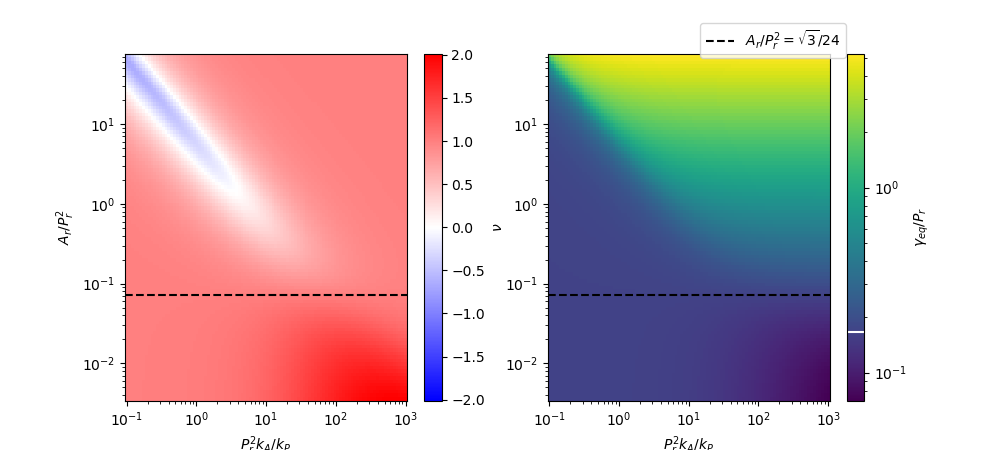

In [113]:
%matplotlib widget
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatterMathtext

def plot_gamma_eq_2d():
    Xratio_range = (0.1, 1000)
    
    ## A_r_tilde = A_r/(P_r)^2
    A_r_til_range = ((np.sqrt(3)/24)*0.05 ,(np.sqrt(3)/24)*1000)
    
    A_r_til_vals, Xratio_vals = np.meshgrid(
        np.logspace(
            np.log10(A_r_til_range[0]),
            np.log10(A_r_til_range[1]),
            100,
        ),
        np.logspace(
            np.log10(Xratio_range[0]),
            np.log10(Xratio_range[1]),
            100,
        ),
    )
    
    poisson_ratio_Z = np.zeros_like(Xratio_vals,dtype=float)
    gamma_til_eq_Z = np.zeros_like(Xratio_vals,dtype=float)
    
    
    for i in range(Xratio_vals.shape[0]):
        for j in range(Xratio_vals.shape[1]):
            X_num = Xratio_vals[i][j]
            A_r_til_num = A_r_til_vals[i][j]
            gamma_til_eq_num = find_gamma_eq_tilde_numeric(
                X_num,
                A_r_til_num,
            )
            
            energy_gradient_at_pt = energy_tilde_gradient_in_alpha_beta(gamma_til_eq_num, gamma_til_eq_num, X_num, A_r_til_num)
            is_an_equilibrium = np.abs(energy_gradient_at_pt).min() < 1e-5

            hessian_eigen_res = get_equilibrium_hessian_eigenmodes(gamma_til_eq_num, X_num, A_r_til_num)
            is_stable = hessian_eigen_res.eigenvalues.min() > 0


            if is_an_equilibrium: #and is_stable:
                gamma_til_eq_Z[i][j] = gamma_til_eq_num
                
                poisson_ratio_Z[i][j] = poisson_ratio_tilde_numeric_f(
                    gamma_til_eq_num,
                    X_num,
                    A_r_til_num,
                )
            else:
                # gamma_til_eq_Z[i][j] = 0
                # poisson_ratio_Z[i][j] = 0

                if is_stable:
                    print("hmmm")
                    print("X:",X_num)
                    print("A_r_til",A_r_til_num)
                    print("gamma_til_eq;",gamma_til_eq_num)
                    # print("stable: ",is_stable)
                    print("is an equilibrium: ",is_an_equilibrium)
                    print("energy gradient: ", energy_gradient_at_pt)
                    
                    print("hessian eigenvas & vecs:",hessian_eigen_res)
            
            
#     # Z1 = np.exp(-X**2 - Y**2)
    plt.close('all')
    fig, ax = plt.subplots(1,2,figsize=(10,4.5))

    p_ratio_max_magnitude = np.abs(poisson_ratio_Z).max()

    im_poisson_ratio = ax[0].pcolormesh(
        Xratio_vals,
        A_r_til_vals,
        poisson_ratio_Z,
        cmap='bwr' ,
        vmin= -p_ratio_max_magnitude,
        vmax=  p_ratio_max_magnitude,
    )

    
    im_gamma_til_eq = ax[1].pcolormesh(
        Xratio_vals,
        A_r_til_vals,
        gamma_til_eq_Z,
        cmap='viridis' ,
        norm=LogNorm(),
        # vmin= -p_ratio_max_magnitude,
        # vmax=  p_ratio_max_magnitude,
    )
    
    ax[0].set_xscale('log')
    ax[0].set_yscale('log')
    ax[1].set_xscale('log')
    ax[1].set_yscale('log')

    
    ax[0].set_ylabel(r"$A_r/P_r^2$")
    ax[0].set_xlabel(r"$P_r^2 k_A/k_P$")
    # ax[1].set_ylabel(r"$A_r/P_r^2$")
    ax[1].set_xlabel(r"$P_r^2 k_A/k_P$")
    cbar_poisson  =fig.colorbar(im_poisson_ratio, orientation='vertical', label=r"$\nu$")#, format=LogFormatterMathtext())
    
    cbar_gamma  =fig.colorbar(im_gamma_til_eq, orientation='vertical', label=r"$\gamma_{eq}/P_r$", format=LogFormatterMathtext())
    
    cbar_gamma.ax.axhline(1/6, c='w', label=r"\gamma_{eq}/P_r=1/6")
    ax[1].axhline(np.sqrt(3)/24, c='black', linestyle='--', label=r"$A_r/P_r^2 = \sqrt{3}/24$")
    ax[0].axhline(np.sqrt(3)/24, c='black', linestyle='--')
    
    ax[1].sharex(ax[0])
    ax[1].sharey(ax[0])

    plt.legend(loc='upper center', bbox_to_anchor=(0.8,1.11))
    plt.show()


plot_gamma_eq_2d()

In [121]:
def test_some_neg_pt(X_test=0.53):
    # X_test = 0.53
    A_r_t_test = 11
    print("Using X_test={}, A_r_test={}".format(X_test,A_r_t_test))
    gamm_val = find_gamma_eq_tilde_numeric(X_test,A_r_t_test)

    print(gamm_val)
    hessian = find_hessian_numeric(gamm_val,gamm_val, X_test, A_r_t_test)
    print("hessian: ", hessian)
    # print
    eigenmodes = get_equilibrium_hessian_eigenmodes(gamm_val, X_test, A_r_t_test)
    print("eigenmodes: ")
    print("    eigenvalues:", eigenmodes.eigenvalues)
    print("    eigenvectors", eigenmodes.eigenvectors)
    print("poisson ratio:", hessian[0][1]/hessian[1][1])
    # print("hessian eigen
    # print("from numeric function:", poisson_ratio_tilde_numeric_f(gamm_val, X_test, A_r_t_test))
    print("")
    

test_some_neg_pt()
test_some_neg_pt(0.1)
# test_some_neg_pt(0.01)
# test_some_neg_pt(0.001)

Using X_test=0.53, A_r_test=11
0.671609588818242
hessian:  [[ 27.99388987 -12.60546762]
 [-12.60546762  27.99388987]]
eigenmodes: 
    eigenvalues: [40.5993575  15.38842225]
    eigenvectors [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
poisson ratio: -0.45029353478395334

Using X_test=0.1, A_r_test=11
0.19777803537320546
hessian:  [[19.46854702 10.97410573]
 [10.97410573 19.46854702]]
eigenmodes: 
    eigenvalues: [30.44265275  8.49444129]
    eigenvectors [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
poisson ratio: 0.5636838597835585



### note:
$$ P = 6\gamma $$
$$ A = \frac{3\sqrt{3}}{2}\gamma^2 $$

So, showing line where $A_{rest}$ and $P_{rest}$ correspond to the same gamma:
$$ A \cdot  \frac{2}{3\sqrt{3}} = \gamma_{eq}^2 $$
$$ \frac{1}{36} P_{rest}^2 = \gamma_{eq}^2 $$
$$ A \cdot  \frac{2}{3\sqrt{3}} = \frac{1}{36} P_{rest}^2  $$
$$ \frac{A}{P_{rest}^2} =  \frac{\sqrt{3}}{24}  $$

### Where does negative poisson ratio come from?

The on-diagonal terms of the hessian are positive at equilibrium so it's the sign of the off-diagonal terms that determine the sign of the poisson ratio. When $\frac{\partial^2 \tilde{E}}{\partial \tilde{\alpha} \partial \tilde{\beta}} > 0$, we have the positive poisson ratio - but when it's negative, we have negative poisson ratio.

Looking at the off diagonal term at some gamma:

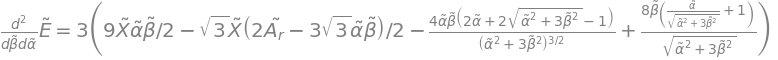

In [130]:
dE_dalpha_dbeta_example = E_tilded.diff(alpha_til, beta_til)

sympy.Eq(
    sympy.Derivative(sympy.symbols(r"\tilde{E}"), alpha_til, beta_til),
    dE_dalpha_dbeta_example,
)

# Substituting in gamma for alpha and beta, and expressing that we want this to be positive:

In [139]:
dE_dalpha_dbeta_at_GAM = dE_dalpha_dbeta_example.subs([
    (alpha_til, gamma_til),
    (beta_til, gamma_til),
])

dE_dalpha_dbeta_at_GAM > 0

In [140]:
sympy.solve(dE_dalpha_dbeta_at_GAM.expand() > 0, X_til)

### this is inequality:

$$ 3 \tilde{X} \left(-\sqrt{3}\tilde{A_r} + 9 \tilde{\gamma_{eq}}^2 \right) > -9 - \frac{3}{2\tilde{\gamma_{eq}}} $$
$$ 3 \tilde{X} \left(\sqrt{3}\tilde{A_r} - 9 \tilde{\gamma_{eq}}^2 \right) < 9 + \frac{3}{2\tilde{\gamma_{eq}}} $$
$$ 3 \tilde{k_A} \left(\sqrt{3}\tilde{A_r} - 9 \tilde{\gamma_{eq}}^2 \right) < \tilde{k_P}\left( 9 + \frac{3}{2\tilde{\gamma_{eq}}}\right) $$

When this is satisfied, $\frac{\partial^2 \tilde{E}}{\partial \tilde{\alpha} \partial \tilde{\beta}} > 0$, and changes in $\tilde{\alpha}$ and $\tilde{\beta}$ together are specifically punished.